# Introduction to Data Science
## Homework 3 Solutions

Student Name: Solutions

Student Netid: Solutions
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

<p><b>Show that Mutual Information and Information Gain are the same.</b><br><br>

We'll start with Mutual Informatation, defined below, and show that it is the same as IG.<br><br>
$MI=\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(x,y) * log\frac{p(x,y)}{p(x)p(y)}$
<br><br>
Using Bayes Rule, we know that $p(x,y) = p(y|x)\:p(x)$. We can substitute this in to get:<br><br>

$MI=\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(y|x)p(x) * log\frac{p(y|x)}{p(y)}$<br><br>
We then use the fact that $log(a/b)=log(a)-log(b)$ to get:<br><br>

$MI=\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(y|x)p(x) * log(p(y|x)) \:-\:
\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(y|x)p(x) *log(p(y))$<br><br>
If we rearrange the summation in the first term above, we get:<br><br>

$\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(y|x)p(x) * log(p(y|x))=\sum\limits_{x\in X} p(x) \sum\limits_{y\in Y} p(y|x)*log(p(y|x))$<br><br>
This last term is equivalent to the negative conditional entropy $-H(Y|X)$.<br><br>
Similarly, we can use the Law of Total Probability to show that:<br><br>
$\sum\limits_{y\in Y} \sum\limits_{x\in X} \: p(y|x)p(x) *log(p(y)) = \sum\limits_{y\in Y}\:log(p(y)) \sum\limits_{x\in X} \: p(y|x)p(x)=\sum\limits_{y\in Y}p(y)*log(p(y))$<br><br>
This last term above is equivalent to the negative Entropy of Y, $-H(Y)$.<br><br>
We have thus shown that:<br><br>
$MI=-H(Y|X)- (-H(Y)) = IG$

</p>


### Part 2 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [12]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/Cell2Cell_data.csv", header=0, sep=',')

def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index)) #randomly permutes the dataframe index
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

train_df, test_df = trainTest(data, 0.8)


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:red">
This question essentially is asking if there might be sampling or selection bias present in the split datasets. This is something that is possible if there were any human error (due to logical flaws in the code) or small sample sizes. The definition of selection bias is that $P(Train|X) \ne P(Train)$. So one thing we can do is build a model to predict P(Train|X) by combining both the data from 'train_df' and 'test_df' above. We can assign a label $Y=1$ to data from 'train_df' and build a classifier using $X$. If there is no bias, then our model should have no signal. We can use any variety of statistical tests (such as no features having statistical significance in a logistic regression), or test to see if the AUC=0.5 (implying a random model).
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [17]:
from sklearn.tree import DecisionTreeClassifier

label = 'churndep'

tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(train_df.drop([label], axis=1), train_df[label])


DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=None, max_features=None, min_density=None,
            min_samples_leaf=1, min_samples_split=2, random_state=None,
            splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

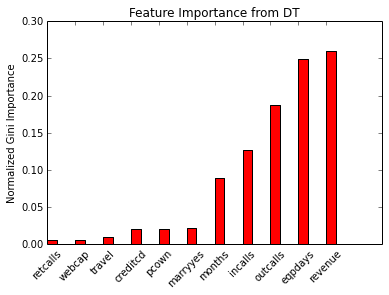

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#Explicitly pull out the data we need
newdf = pd.DataFrame({'imp':tree.feature_importances_, 'feat':train_df.drop(label, 1).columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)


fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(newdf.imp.values)), newdf.imp.values, width, color='r')
ax.set_xticks(np.arange(len(newdf.imp.values)))
ax.set_xticklabels(newdf.feat.values, rotation=45)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [20]:
#We can check the direction of the relationship by measuring the correlation between the top variables and churndep
train_df[['churndep','eqpdays','revenue','outcalls']].corr()

/Users/briand/anaconda/lib/python2.7/site-packages/pandas/core/config.py:570: DeprecationWarning: height has been deprecated.

  warnings.warn(d.msg, DeprecationWarning)
/Users/briand/anaconda/lib/python2.7/site-packages/pandas/core/config.py:570: DeprecationWarning: height has been deprecated.

  warnings.warn(d.msg, DeprecationWarning)


,churndep,eqpdays,revenue,outcalls
churndep,1.000000,0.108765,-0.012604,-0.033267
eqpdays,0.108765,1.000000,-0.219353,-0.245012
revenue,-0.012604,-0.219353,1.000000,0.492470
outcalls,-0.033267,-0.245012,0.492470,1.000000


<p>
<span style="color:red">
The correlation table shows that eqpdays is positively correlated with churn while outcalls and revenue are negatively correlated.
Revenue and Outcalls are correlated and they generally describe the amount of usage the person has on their phone. We should expect that if the person uses their service a lot then they are both satisfied and getting their money’s worth. Thus, we should expect they are less likely to churn. 

Eqpdays is less obvious, but we might assume that customers that have had their equipment longer are more likely to want a new phone. When confronted with the choice of a new phone, the customer might also consider shopping around with other providers to get the best deal.

</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [32]:
# Code here
from sklearn import metrics

train_p = tree.predict(train_df.drop([label], axis=1))
test_p = tree.predict(test_df.drop([label], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df[label])
test_accuracy = metrics.accuracy_score(test_p, test_df[label])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)


train accuracy = 0.999811835544, test accuracy = 0.530732563974


### Part 3 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [33]:
# Code here

min_samples_split_values = np.logspace(1, 12, num=10, base=2)
min_samples_leaf_values = np.logspace(1, 12, num=10, base=2)


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:red">
We need to explore a wide range of values, although with no prior knowledge of the problem space, it is hard to know exactly what range. We know that the values should be fairly well distributed on a log-scale, as this is the strategy one usually takes when deciding on an appropriate grid for grid search. We can evaluate later whether we have covered a large enough range.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

def testTrees(train, test, label, split, leaf):
    '''
    Build a function that takes in tree hyperparams, data and returns accuracy on test data
    '''
    clf = DecisionTreeClassifier(criterion='entropy', 
                                min_samples_leaf = leaf, min_samples_split = split)
    
    clf.fit(train.drop(label, 1), train[label])
    test_p = clf.predict(test_df.drop(label, 1))
    
    return metrics.accuracy_score(test_p, test_df[label])
    
 
#Initialize a results dictionary
res = dict()
for s in min_samples_split_values:
    res[s] = list()

#Now train and get results for each option
for s in min_samples_split_values:
    for l in min_samples_leaf_values:
        res[s].append(testTrees(train_df, test_df, label, s, l))    



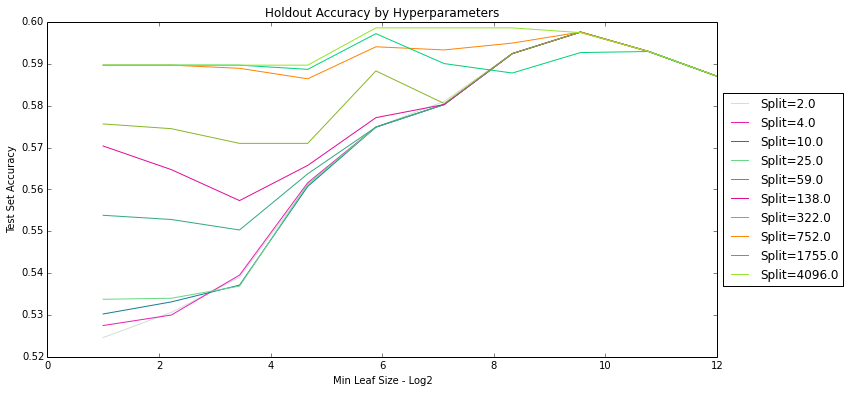

In [43]:
#Now we'll plot the results of above
def r():
    return np.random.rand()

#Now plot            
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(111)

for s in min_samples_split_values:
    plt.plot(np.log2(min_samples_leaf_values), res[s], 
             color=(r(),r(),r()), label='Split={}'.format(np.floor(s)))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc=4, ncol=3, mode="expand")
ax.set_xlabel('Min Leaf Size - Log2')
ax.set_ylabel('Test Set Accuracy')
plt.title('Holdout Accuracy by Hyperparameters')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:red">


The optimal test set accuracy will of course depend on the exact parameters chosen so we cannot say we find the true theoretical optimal configuration. Nonetheless, we see best results where Log2(Leaf Size) = 6 and Split size = 4096. Overall, when Split is high and Leaf size is in the mid range we get consistent and good results. The best accuracy is between 59-60%.

</span>

</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:red">

Customer churn is a negative outcome for a business, as it both reduces revenues and it increases the chance that customers might give negative reviews of the service. The negative reviews can then influence other customers to churn or prevent other customers from signing up. It is important for the business to predict churn to design marketing strategies that focus on those who are most at risk of churning.  There are both short and long term strategies to be employed here.

In the short term, the company might want to find the most likely churners and offer some special incentive to convince them to stay with the company. An example might be a discount on a new phone or more minutes for the same price.

For the long-term strategy, the company can use the churn model to better understand the drivers of churn.  With this understanding the company can think of ways to better improve the customer experience so that churn is prevented even before there is a direct intervention. 

</span>


</p>